In [127]:
import pandas as pd
import os

In [128]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
import joblib
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')


In [129]:
path = os.getcwd()
path_of_file = path + "/fraude.csv"

In [130]:
dados_fraude = pd.read_csv(path_of_file)

## Análise Exploratória dos Dados

In [131]:
dados_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [132]:
dados_fraude.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [133]:
# contar a quantidade de NaN values por colunas
print(dados_fraude.isna().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


não há dados nulos

In [134]:
#verificar a presença de outliers
dados_fraude.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [135]:
dados_fraude = dados_fraude.drop("Unnamed: 0", axis=1)

In [136]:
##### Verificando a quantidade de elementos distintos nas colunas

for c in dados_fraude.columns:

    print(c)
    print(len(dados_fraude.groupby([c]).count()))
    print("-"*10)

trans_date_trans_time
1274791
----------
cc_num
983
----------
merchant
693
----------
category
14
----------
amt
52928
----------
first
352
----------
last
481
----------
gender
2
----------
street
983
----------
city
894
----------
state
51
----------
zip
970
----------
lat
968
----------
long
969
----------
city_pop
879
----------
job
494
----------
dob
968
----------
trans_num
1296675
----------
unix_time
1274823
----------
merch_lat
1247805
----------
merch_long
1275745
----------
is_fraud
2
----------


é possível observar que há muita variabilidade nas seguintes colunas:
- trans_date_trans_time
- trans_num
- unix_time
- merch_lat
- merch_long

Portanto dificilmente, essas colunas serão interessantes... Portanto, vamos remover elas!

#### Excluindo as colunas com uma maior variabilidade!

In [137]:
dados_fraude = dados_fraude.drop(['trans_date_trans_time','trans_num','unix_time','merch_lat','merch_long'], axis=1)

#### Verificando os valores contidos em merchant

In [138]:
merchant_list = set(dados_fraude["merchant"].values)
qtd_split = []
for i in merchant_list:
    qtd_split.append(len(i.split(",")))

set(qtd_split)

{1, 2}

Como só tem duas possibilidades de merchant, então vamos dar um split assim diminui a variabilidade das categorias em cima dessa classe

#### Transformando dob para a coluna year, month e day

In [139]:
dados_fraude[['year', 'month', 'day']] = dados_fraude['dob'].str.split('-', expand=True)

In [140]:
dados_fraude['year'] = dados_fraude['year'].astype('int')
dados_fraude['month'] = dados_fraude['month'].astype('int')
dados_fraude['day'] = dados_fraude['day'].astype('int')

In [141]:
dados_fraude = dados_fraude.drop(['dob'], axis=1)

In [142]:
dados_fraude[['merchant_1', 'merchant_2']] = dados_fraude['merchant'].str.split(',', expand=True)

In [143]:
dados_fraude = dados_fraude.drop(['merchant'], axis=1)

#### verificar quais são as possibilidades  de target


In [144]:
set(dados_fraude["is_fraud"].values)

{0, 1}

In [145]:
#Verificar quantos dados na classe 0
len(dados_fraude[dados_fraude["is_fraud"] == 0])

1289169

In [146]:
#Verificar quantos dados na classe 1
len(dados_fraude[dados_fraude["is_fraud"] == 1])

7506

A base de dados está muito desbalanceada

### Identificação de feature importance com DecisionTree

In [147]:
dados_fraude_analysis = dados_fraude

In [148]:
string_columns = ["merchant_1","merchant_2","category","first","last","gender","street","city","state", "job"]

for c in string_columns:

    dados_fraude_analysis[c] = dados_fraude_analysis[c].astype('category')
    dados_fraude_analysis[c] = dados_fraude_analysis[c].cat.codes

In [149]:
dados_fraude_analysis.head(2)

,cc_num,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,is_fraud,year,month,day,merchant_1,merchant_2
0,2703186189652095,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,0,1988,3,9,486,118
1,630423337322,4,107.23,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,0,1978,6,21,226,69


In [150]:
dados_fraude_analysis = dados_fraude_analysis[['cc_num', 
                                               'merchant_1',
                                               'merchant_2',
                                               'category', 
                                               'amt',
                                               'first',
                                               'last',
                                               'gender',
                                               'street',
                                               'city', 
                                               'state',
                                               'zip', 
                                               'lat',
                                               'long',
                                               'city_pop',
                                               'job', 
                                               'day', 
                                               'year', 
                                               'month', 
                                               'is_fraud'
                                               ]]

In [151]:
dados_fraude_analysis

,cc_num,merchant_1,merchant_2,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,day,year,month,is_fraud
0,2703186189652095,486,118,8,4.97,162,18,0,568,526,27,28654,36.0788,-81.1781,3495,370,9,1988,3,0
1,630423337322,226,69,4,107.23,309,157,0,435,612,47,99160,48.8878,-118.2105,149,428,21,1978,6,0
2,38859492057661,370,-1,0,220.11,115,381,1,602,468,13,83252,42.1808,-112.2620,4154,307,19,1962,1,0
3,3534093764340240,339,88,2,45.00,163,463,1,930,84,26,59632,46.2306,-112.1138,1939,328,12,1967,1,0
4,375534208663984,282,-1,9,41.96,336,149,1,418,216,45,24433,38.4207,-79.4629,99,116,28,1986,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,474,-1,0,15.56,121,332,1,154,330,44,84735,37.7175,-112.4777,258,215,24,1961,11,0
1296671,6011149206456997,2,-1,1,51.70,160,463,1,856,813,20,21790,39.2667,-77.5101,100,360,11,1979,12,0
1296672,3514865930894695,563,-1,1,105.93,74,67,1,158,346,32,88325,32.9396,-105.8189,899,308,30,1967,8,0
1296673,2720012583106919,481,203,1,74.90,179,304,1,433,471,41,57756,43.3526,-102.5411,1126,485,18,1980,8,0


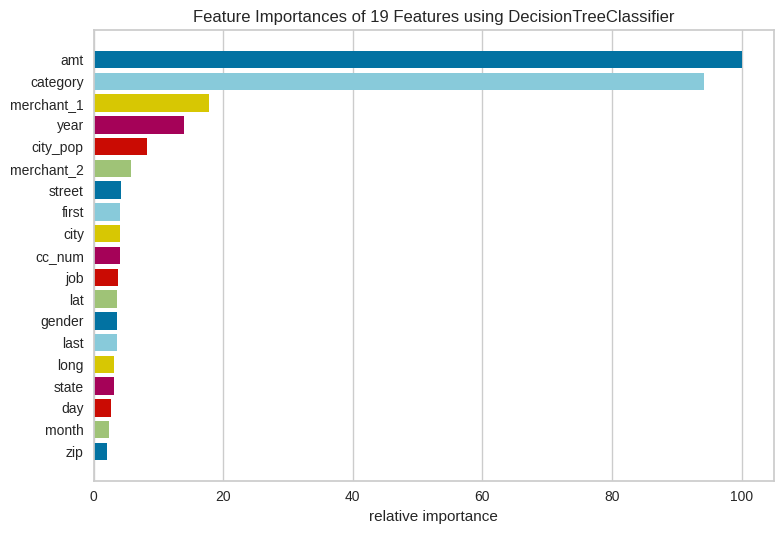

<Axes: title={'center': 'Feature Importances of 19 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [152]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.features import FeatureImportances

X = dados_fraude_analysis.iloc[:, 0: len(dados_fraude_analysis.columns)-1]
y = dados_fraude_analysis.iloc[:, len(dados_fraude_analysis.columns)-1:len(dados_fraude_analysis.columns)]

clf = DecisionTreeClassifier()
viz = FeatureImportances(clf)
viz.fit(X, y)
viz.poof()

Percebe-se que há uma correlação extremamente alta entre o "amt", "category" com o target

#### Seleção de algumas variáveis conforme o EDA e a semântica delas

In [153]:
dados_fraude_analysis = dados_fraude_analysis[["amt", "merchant_1", "merchant_2","category","year","city_pop","is_fraud"]]

In [154]:
dados_fraude_analysis

,amt,merchant_1,merchant_2,category,year,city_pop,is_fraud
0,4.97,486,118,8,1988,3495,0
1,107.23,226,69,4,1978,149,0
2,220.11,370,-1,0,1962,4154,0
3,45.00,339,88,2,1967,1939,0
4,41.96,282,-1,9,1986,99,0
...,...,...,...,...,...,...,...
1296670,15.56,474,-1,0,1961,258,0
1296671,51.70,2,-1,1,1979,100,0
1296672,105.93,563,-1,1,1967,899,0
1296673,74.90,481,203,1,1980,1126,0


In [155]:
dados_fraude_final = dados_fraude_analysis.reset_index()

### Criação do Ground Truth

#### A base de dados foi balanceada, desse modo apresenta a mesma quantidade de labels de fraud nos dados de treinamento e teste. Sendo que, 90% da base balanceada foi usada para treinamento, já 10% para teste.

In [156]:
dados_fraude_final = dados_fraude_final[["index", "amt", "merchant_1", "merchant_2", "category", "year", "city_pop", "is_fraud"]]

In [157]:
# vetor de bases com y = 0 e y = 1
vec_conjunto_vdd = []

# Dados do Dataframe que a label "y" é 0
df_process_y0 = dados_fraude_final[dados_fraude_final['is_fraud'] == 0]

df_process_y0 = df_process_y0.sample(n = 350, random_state=1)

vec_conjunto_vdd.append(df_process_y0)

# Dados do Dataframe que a label "y" é 1
df_process_y1 = dados_fraude_final[dados_fraude_final['is_fraud'] == 1]

df_process_y1 = df_process_y1.sample(n = 350, random_state=1)

# vetor com o conjunto verdade balanceado
vec_conjunto_vdd.append(df_process_y1)

# Planejamento do conjunto de treinamento
# - 10% da base com menor frequência
# - Base com menor frequência = 750
# - Conjunto verdade = 350*2

vec_df_vdd = pd.concat(vec_conjunto_vdd)

print(vec_df_vdd)

vec_df_vdd.to_csv('conj_vdd_fraude_teste.csv')

           index     amt  merchant_1  merchant_2  category  year  city_pop  \
9584        9584   26.92           5          -1         5  1933      1202   
739988    739988   18.43         444          -1         7  1965       470   
621698    621698   21.31         452          -1        10  1988      3285   
294759    294759   81.30          97          -1         2  1959       630   
363684    363684  123.45          29          -1        10  1971    413574   
...          ...     ...         ...         ...       ...   ...       ...   
884226    884226    8.73         597          -1        13  1987      2303   
1068949  1068949  788.73         337          -1         8  1957      7420   
715445    715445  332.61          58          -1         4  1942       864   
138946    138946   20.78         387          -1         2  1969      1656   
1245300  1245300  713.00         336          -1         8  1967     13835   

         is_fraud  
9584            0  
739988          0  
621

In [158]:
# Ids do conjunto de teste
ids = vec_df_vdd['index'].values

# Conjunto de treino sem a ocorrência dos exemplos usados no teste
df_conjunto_treino = dados_fraude_final[~dados_fraude_final['index'].isin(ids)]

# vetor de bases com y = 0 e y = 1
vec_conjunto_treino = []

# Dados do Dataframe que a label "is_fraud" é 0
df_process_y0_treino = df_conjunto_treino[df_conjunto_treino['is_fraud'] == 0]

df_process_y0_treino = df_process_y0_treino.sample(n = 3378, random_state=1)

vec_conjunto_treino.append(df_process_y0_treino)

# Dados do Dataframe que a label "is_fraud" é 1
df_process_y1_treino = df_conjunto_treino[df_conjunto_treino['is_fraud'] == 1]

df_process_y1_treino = df_process_y1_treino.sample(n = 3378, random_state=1)

# Planejamento do conjunto de treinamento
# - 90% da base com menor frequência
# - Base com menor frequência = 6756
# - Conjunto verdade = 3378*2

vec_conjunto_treino.append(df_process_y1_treino)

In [159]:
vec_conjunto_treino = pd.concat(vec_conjunto_treino)

print(vec_conjunto_treino)

vec_conjunto_treino.to_csv('conj_vdd_fraude_treino.csv')

           index     amt  merchant_1  merchant_2  category  year  city_pop  \
1050031  1050031   81.90         215          -1         2  1997     10295   
1085764  1085764   77.32         113          -1         2  1967    673342   
568811    568811   79.25         546          -1         3  1964      5438   
407021    407021    5.58         522          -1         9  1997    276896   
20297      20297   62.01         339          88         2  1933     18760   
...          ...     ...         ...         ...       ...   ...       ...   
809843    809843  124.02         460          -1         1  1971       255   
1161338  1161338  900.86           8          -1        11  1939       223   
989001    989001  252.79         395          -1         4  1985    409656   
1233066  1233066  319.12         292          -1         4  1934     31702   
957455    957455   22.79         175          -1         5  1974       241   

         is_fraud  
1050031         0  
1085764         0  
568

### Base de Treino

In [160]:
# Carregar os dados
dados = pd.read_csv('conj_vdd_fraude_treino.csv')

In [161]:
# Embaralhar os dados
dados = dados.sample(n = 6756, random_state = 1) 

# Excluir e resetar as colunas que não são importantes
del dados['Unnamed: 0']
del dados['index']

dados

,amt,merchant_1,merchant_2,category,year,city_pop,is_fraud
3767,15.95,400,32,10,1984,144160,1
3309,137.58,312,-1,4,1960,626,0
3017,10.18,322,-1,13,1964,191096,0
3338,38.35,62,-1,6,1937,2258,0
6393,379.42,445,-1,0,1961,5451,1
...,...,...,...,...,...,...,...
905,137.87,226,69,4,1945,6713,0
5192,10.34,22,-1,2,1973,123,1
3980,19.06,22,-1,2,1956,260,1
235,8.21,181,-1,9,1945,589,0


In [162]:
#------Features------
X_id = dados.iloc[:, 0: len(dados.columns)-1]
y_id = dados.iloc[:, len(dados.columns)-1:len(dados.columns)]

#------Normalização das Features------

scaler = MinMaxScaler()

scaler = scaler.fit(X_id)

X_id = scaler.transform(X_id)

Salvando o scaler para nos ajudar quando formos predizer via API

In [163]:
# Nome do arquivo que será salvo o scaler
nome_arquivo_scaler = 'scaler.sav'

# Dump do scaler
pickle.dump(scaler, open(nome_arquivo_scaler, 'wb'))

### Base de Teste

#### As métricas utilizadas para avaliação são: precisão, recall e f1-score, inclusive não utiliza-se a acurácia, pois ela é muito passível a erros de interpretação.

In [164]:
# Carregar os dados
dados_teste = pd.read_csv('conj_vdd_fraude_teste.csv')
dados_teste

,Unnamed: 0,index,amt,merchant_1,merchant_2,category,year,city_pop,is_fraud
0,9584,9584,26.92,5,-1,5,1933,1202,0
1,739988,739988,18.43,444,-1,7,1965,470,0
2,621698,621698,21.31,452,-1,10,1988,3285,0
3,294759,294759,81.30,97,-1,2,1959,630,0
4,363684,363684,123.45,29,-1,10,1971,413574,0
...,...,...,...,...,...,...,...,...,...
695,884226,884226,8.73,597,-1,13,1987,2303,1
696,1068949,1068949,788.73,337,-1,8,1957,7420,1
697,715445,715445,332.61,58,-1,4,1942,864,1
698,138946,138946,20.78,387,-1,2,1969,1656,1


In [165]:
# Embaralhar os dados
dados_teste = dados_teste.sample(n = 700, random_state= 1) 

# Excluir e resetar as colunas que não são importantes
del dados_teste['Unnamed: 0']
del dados_teste['index']

In [166]:
#------Features------
X_id_teste = dados_teste.iloc[:, 0: len(dados_teste.columns)-1]
y_id_teste = dados_teste.iloc[:, len(dados_teste.columns)-1:len(dados_teste.columns)]

#------Normalização das Features------
X_id_teste = scaler.transform(X_id_teste)

In [167]:
#  Criação do Dataframe com resultados dos classificadores
colunas = ['tipo','precisão', 'recall', 'f1score']
df_resultado = pd.DataFrame(columns = colunas)

# Criação do Dataframe com os valores de saída preditos
colunas = ['y_rf', 'y_dt', 'y_svm', 'y_rl', 'y_nb']
df_valores_preditos = pd.DataFrame(columns = colunas)

In [168]:
# Criação do modelo
modelo_rf = RandomForestClassifier()

# Treinamento do modelo
modelo_rf = modelo_rf.fit(X_id, y_id.values)

# Prevendo os valores de y
result_rf = modelo_rf.predict(X_id_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_teste.values, result_rf, average='macro')

# Inclusão das métricas de avaliação
df_resultado.loc[0, 'tipo'] = 'RF'
df_resultado.loc[0, 'precisão'] = metricas[0]
df_resultado.loc[0, 'recall'] = metricas[1]
df_resultado.loc[0,'f1score'] = metricas[2]

# Incluir os valores preditos pelo RF
df_valores_preditos['y_rf'] = result_rf

In [169]:
df_resultado

,tipo,precisão,recall,f1score
0,RF,0.956165,0.955714,0.955703


Salvando o modelo para nos ajudar a predizer via API

In [170]:
# Nome do arquivo que será salvo o modelo
nome_arquivo_modelo = 'rf_modelo_identificacao_fraud.sav'

# Dump do modelo
pickle.dump(modelo_rf, open(nome_arquivo_modelo, 'wb'))